АНАЛИЗ ДАННЫХ: СОН И ОБРАЗ ЖИЗНИ

A. ЗАГРУЗКА И ПЕРВИЧНЫЙ ОБЗОР

1. ПЕРВЫЕ 5 СТРОК:
   Person ID Gender  Age            Occupation  Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level BMI Category Blood Pressure  Heart Rate  Daily Steps Sleep Disorder
0          1   Male   27     Software Engineer            6.10                 6                       42             6   Overweight         126/83          77         4200            NaN
1          2   Male   28                Doctor            6.20                 6                       60             8       Normal         125/80          75        10000            NaN
2          3   Male   28                Doctor            6.20                 6                       60             8       Normal         125/80          75        10000            NaN
3          4   Male   28  Sales Representative            5.90                 4                       30             8        Obese         140/90          85     

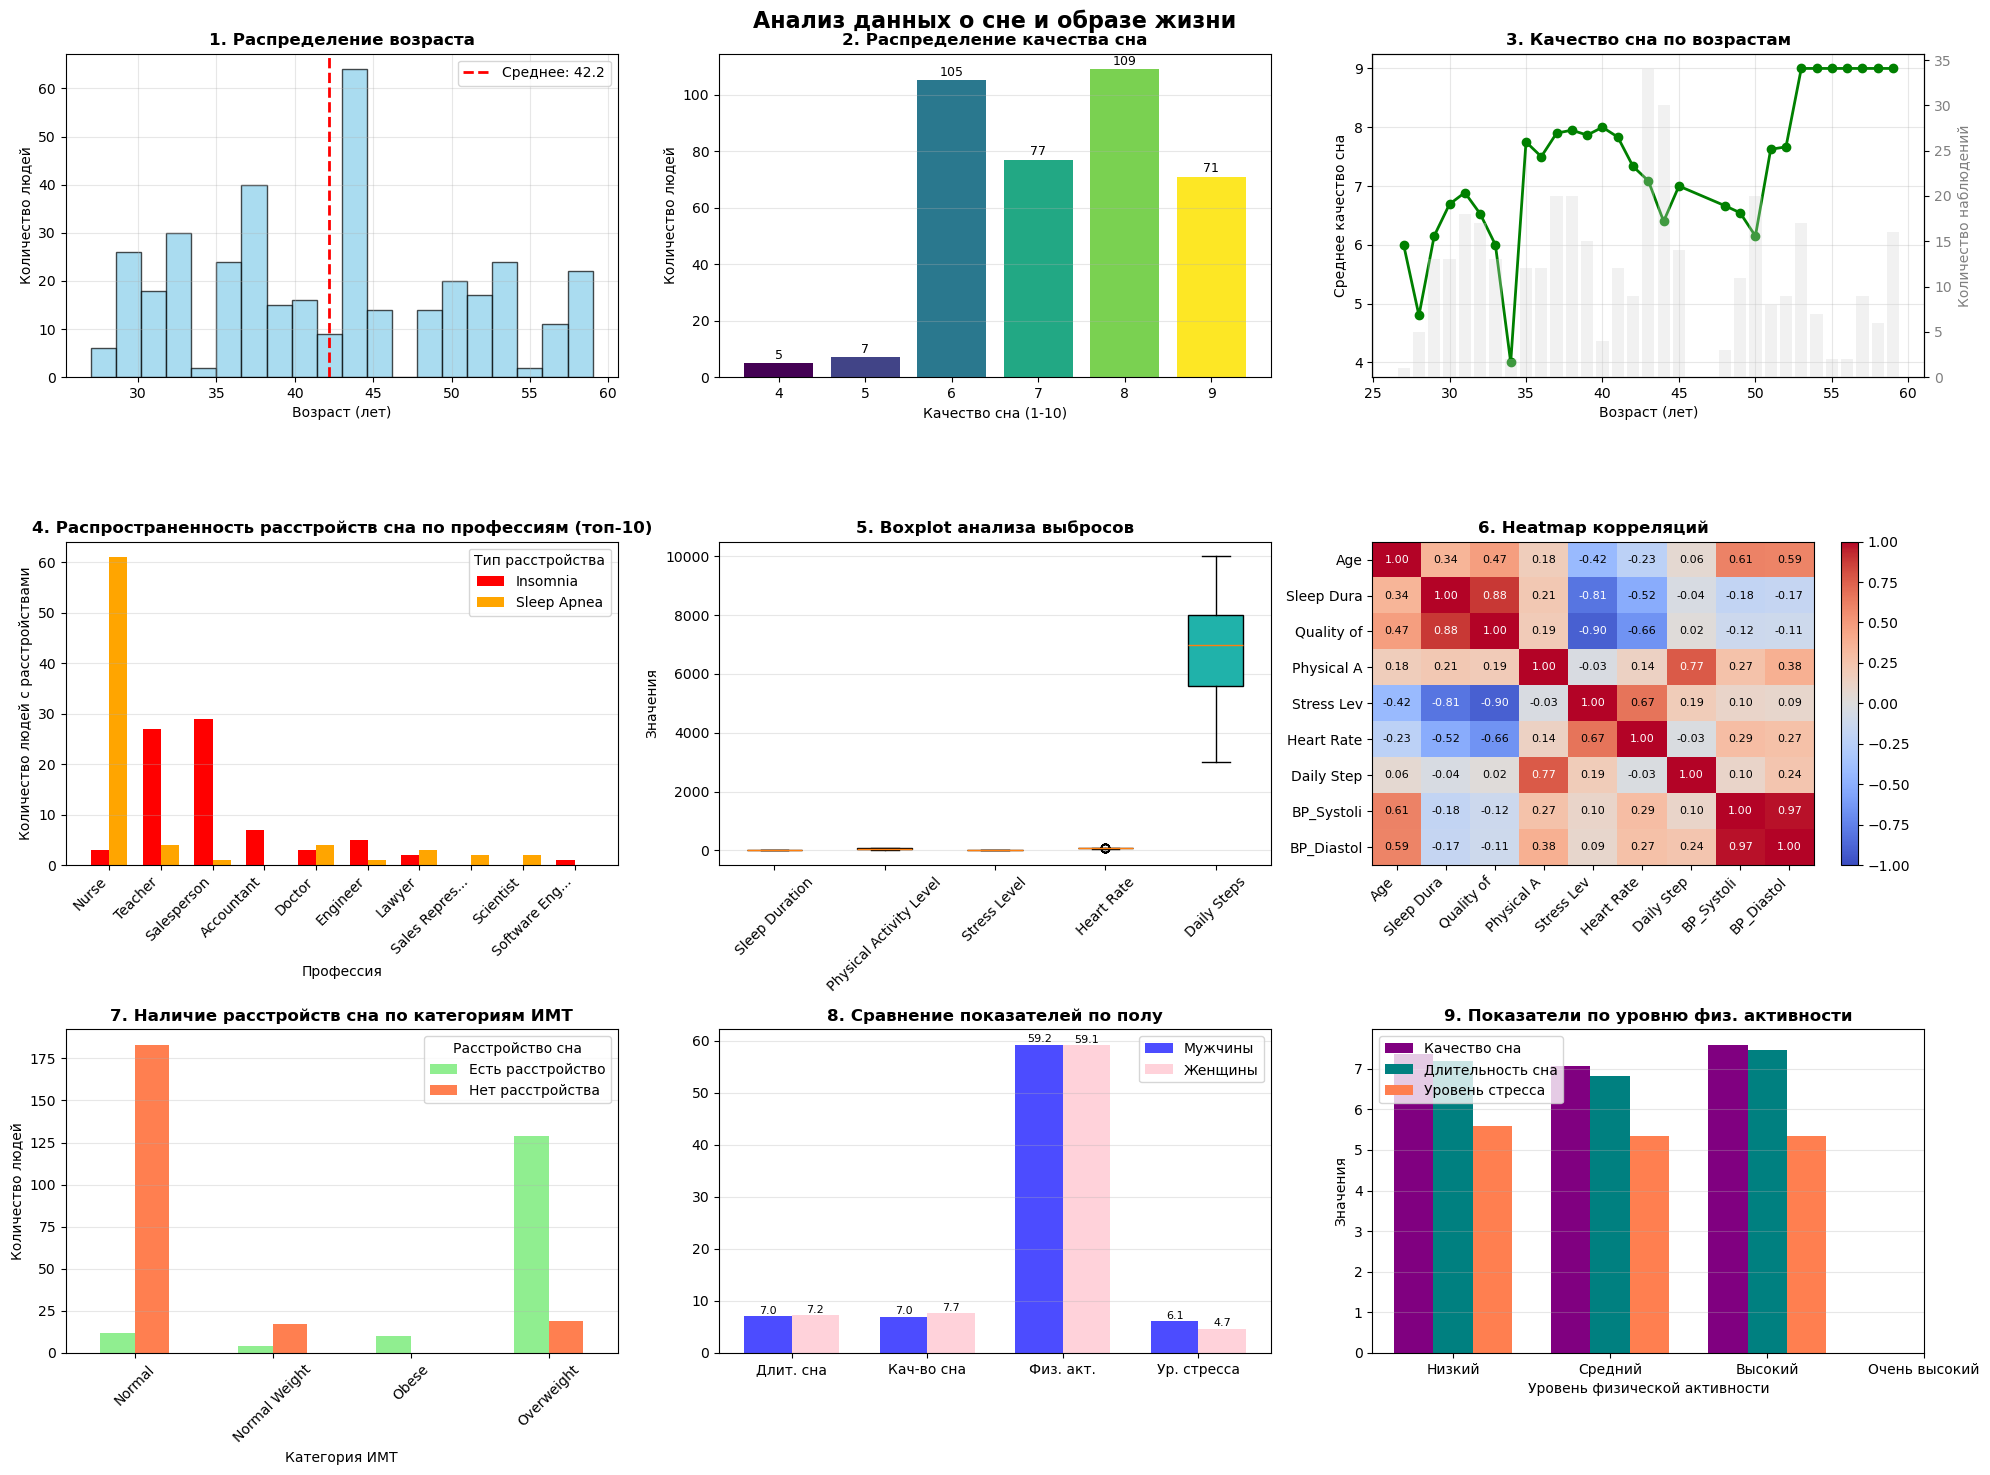


D. СТАТИСТИЧЕСКИЙ АНАЛИЗ

1. ОПИСАТЕЛЬНАЯ СТАТИСТИКА (ключевые показатели):
                         count    mean     std     min     25%     50%     75%      max
Age                     374.00   42.18    8.67   27.00   35.25   43.00   50.00    59.00
Sleep Duration          374.00    7.13    0.80    5.80    6.40    7.20    7.80     8.50
Quality of Sleep        374.00    7.31    1.20    4.00    6.00    7.00    8.00     9.00
Physical Activity Level 374.00   59.17   20.83   30.00   45.00   60.00   75.00    90.00
Stress Level            374.00    5.39    1.77    3.00    4.00    5.00    7.00     8.00
Heart Rate              374.00   70.17    4.14   65.00   68.00   70.00   72.00    86.00
Daily Steps             374.00 6816.84 1617.92 3000.00 5600.00 7000.00 8000.00 10000.00
BP_Systolic             374.00  128.55    7.75  115.00  125.00  130.00  135.00   142.00
BP_Diastolic            374.00   84.65    6.16   75.00   80.00   85.00   90.00    95.00

2. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ (топ-5 сильнейших

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

print("=" * 70)
print("АНАЛИЗ ДАННЫХ: СОН И ОБРАЗ ЖИЗНИ")
print("=" * 70)

# Загрузка данных
df = pd.read_csv('C:\Sleep_health_and_lifestyle_dataset.csv')

## A. ЗАГРУЗКА И ПЕРВИЧНЫЙ ОБЗОР

print("\n" + "=" * 70)
print("A. ЗАГРУЗКА И ПЕРВИЧНЫЙ ОБЗОР")
print("=" * 70)

# 1. Первые строки
print("\n1. ПЕРВЫЕ 5 СТРОК:")
print(df.head())

# 1.2. Последние строки
print("\n\n2. ПОСЛЕДНИЕ 5 СТРОК:")
print(df.tail())

# 2. Структура данных
print(f"\n2. СТРУКТУРА ДАННЫХ:")
print(f"   Количество строк: {df.shape[0]}")
print(f"   Количество столбцов: {df.shape[1]}")

# 3. Типы данных и преобразование
print("\n3. ПРЕОБРАЗОВАНИЕ ДАННЫХ:")
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df = df.drop('Blood Pressure', axis=1)
print("   Столбец 'Blood Pressure' разделен на BP_Systolic и BP_Diastolic")

# Проверяем уникальные значения в Sleep Disorder
print("\n4. УНИКАЛЬНЫЕ ЗНАЧЕНИЯ В SLEEP DISORDER:")
print(df['Sleep Disorder'].value_counts())
print(f"Всего уникальных значений: {df['Sleep Disorder'].nunique()}")

## B. ОБРАБОТКА ДАННЫХ

print("\n" + "=" * 70)
print("B. ОБРАБОТКА ДАННЫХ")
print("=" * 70)

### B.1 Пропущенные значения
print("\n1. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("   ✓ Пропущенных значений не обнаружено")

### B.2 Дубликаты
print("\n2. ДУБЛИКАТЫ:")
duplicates_count = df.duplicated().sum()
print(f"   Найдено дубликатов: {duplicates_count}")

if duplicates_count > 0:
    initial_rows = df.shape[0]
    df = df.drop_duplicates()
    print(f"   Удалено {duplicates_count} дубликатов")
    print(f"   Новый размер данных: {df.shape[0]} строк (удалено {initial_rows - df.shape[0]})")

### B.3 Создаем новый столбец для анализа
print("\n3. СОЗДАНИЕ НОВОГО СТОЛБЦА ДЛЯ АНАЛИЗА:")
# Создаем столбец, указывающий наличие любого расстройства сна
df['Has_Sleep_Disorder'] = df['Sleep Disorder'].apply(lambda x: 'Есть расстройство' if pd.notna(x) and x != 'None' else 'Нет расстройства')
print("   Создан столбец 'Has_Sleep_Disorder'")
print(f"   Распределение: {df['Has_Sleep_Disorder'].value_counts().to_dict()}")

## C. ВИЗУАЛИЗАЦИЯ ДАННЫХ С ПОМОЩЬЮ PLOT

print("\n" + "=" * 70)
print("C. ВИЗУАЛИЗАЦИЯ ДАННЫХ (5+ ГРАФИКОВ)")
print("=" * 70)

# Создаем фигуру для всех графиков
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Анализ данных о сне и образе жизни', fontsize=16, fontweight='bold')

### График 1: Гистограмма распределения возраста
ax1 = plt.subplot(3, 3, 1)
ax1.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
ax1.set_title('1. Распределение возраста', fontsize=12, fontweight='bold')
ax1.set_xlabel('Возраст (лет)')
ax1.set_ylabel('Количество людей')
ax1.grid(True, alpha=0.3)

# Добавляем вертикальную линию для среднего значения
mean_age = df['Age'].mean()
ax1.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_age:.1f}')
ax1.legend()

### График 2: Распределение качества сна
ax2 = plt.subplot(3, 3, 2)
sleep_quality_counts = df['Quality of Sleep'].value_counts().sort_index()
bars = ax2.bar(sleep_quality_counts.index, sleep_quality_counts.values, 
              color=plt.cm.viridis(np.linspace(0, 1, len(sleep_quality_counts))))
ax2.set_title('2. Распределение качества сна', fontsize=12, fontweight='bold')
ax2.set_xlabel('Качество сна (1-10)')
ax2.set_ylabel('Количество людей')
ax2.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)

### График 3: Линейный график - зависимость качества сна от возраста
ax3 = plt.subplot(3, 3, 3)
# Группируем по возрасту
age_groups = df.groupby('Age').agg({
    'Quality of Sleep': 'mean',
    'Sleep Duration': 'mean',
    'Person ID': 'count'
}).reset_index()

ax3.plot(age_groups['Age'], age_groups['Quality of Sleep'], 
        marker='o', linewidth=2, markersize=6, color='green')
ax3.set_title('3. Качество сна по возрастам', fontsize=12, fontweight='bold')
ax3.set_xlabel('Возраст (лет)')
ax3.set_ylabel('Среднее качество сна')
ax3.grid(True, alpha=0.3)

# Добавляем вторую ось для количества наблюдений
ax3_secondary = ax3.twinx()
ax3_secondary.bar(age_groups['Age'], age_groups['Person ID'], 
                 alpha=0.3, color='lightgray', label='Количество наблюдений')
ax3_secondary.set_ylabel('Количество наблюдений', color='gray')
ax3_secondary.tick_params(axis='y', labelcolor='gray')

### График 4: Столбчатая диаграмма - расстройства сна по профессиям
ax4 = plt.subplot(3, 3, 4)
# Группируем данные по профессиям и типам расстройств сна
profession_disorder = pd.crosstab(df['Occupation'], df['Sleep Disorder'])

# Проверяем, какие типы расстройств есть в данных
print(f"\nТипы расстройств сна в данных: {profession_disorder.columns.tolist()}")

# Сортируем профессии по общему количеству людей с расстройствами
profession_disorder['Total'] = profession_disorder.sum(axis=1)
top_professions = profession_disorder.sort_values('Total', ascending=False).head(10)
top_professions = top_professions.drop('Total', axis=1)

x = np.arange(len(top_professions.index))
width = 0.35

# Создаем столбцы для каждого типа расстройств
colors = {'Insomnia': 'red', 'Sleep Apnea': 'orange'}
disorder_types = top_professions.columns

for i, disorder in enumerate(disorder_types):
    ax4.bar(x + (i - len(disorder_types)/2 + 0.5) * width, 
            top_professions[disorder], width, 
            label=disorder, color=colors.get(disorder, f'C{i}'))

ax4.set_title('4. Распространенность расстройств сна по профессиям (топ-10)', 
              fontsize=12, fontweight='bold')
ax4.set_xlabel('Профессия')
ax4.set_ylabel('Количество людей с расстройствами')
ax4.set_xticks(x)
ax4.set_xticklabels([occ[:12] + '...' if len(occ) > 12 else occ for occ in top_professions.index], 
                   rotation=45, ha='right')
ax4.legend(title='Тип расстройства')
ax4.grid(True, alpha=0.3, axis='y')

### График 5: Boxplot - анализ выбросов
ax5 = plt.subplot(3, 3, 5)
# Выбираем ключевые метрики
metrics = ['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
data_to_plot = [df[metric] for metric in metrics]

boxplot = ax5.boxplot(data_to_plot, patch_artist=True, tick_labels=metrics)
# Раскрашиваем boxplot
colors_box = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen']
for patch, color in zip(boxplot['boxes'], colors_box):
    patch.set_facecolor(color)

ax5.set_title('5. Boxplot анализа выбросов', fontsize=12, fontweight='bold')
ax5.set_ylabel('Значения')
ax5.grid(True, alpha=0.3, axis='y')
ax5.tick_params(axis='x', rotation=45)

### График 6: Heatmap корреляций
ax6 = plt.subplot(3, 3, 6)
# Выбираем числовые столбцы для корреляции
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                'Physical Activity Level', 'Stress Level', 
                'Heart Rate', 'Daily Steps', 'BP_Systolic', 'BP_Diastolic']

# Проверяем, что все столбцы существуют
numeric_cols = [col for col in numeric_cols if col in df.columns]
corr_matrix = df[numeric_cols].corr()

# Создаем heatmap
im = ax6.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Добавляем подписи
ax6.set_xticks(np.arange(len(numeric_cols)))
ax6.set_yticks(np.arange(len(numeric_cols)))
ax6.set_xticklabels([col[:10] for col in numeric_cols], rotation=45, ha='right')
ax6.set_yticklabels([col[:10] for col in numeric_cols])

# Добавляем значения корреляции
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text = ax6.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", 
                       color="black" if abs(corr_matrix.iloc[i, j]) < 0.7 else "white",
                       fontsize=8)

ax6.set_title('6. Heatmap корреляций', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax6)

### График 7: Наличие расстройств сна по BMI категориям
ax7 = plt.subplot(3, 3, 7)
# Группируем по категориям ИМТ
bmi_disorder = pd.crosstab(df['BMI Category'], df['Has_Sleep_Disorder'])

bmi_disorder.plot(kind='bar', ax=ax7, color=['lightgreen', 'coral'])
ax7.set_title('7. Наличие расстройств сна по категориям ИМТ', fontsize=12, fontweight='bold')
ax7.set_xlabel('Категория ИМТ')
ax7.set_ylabel('Количество людей')
ax7.legend(title='Расстройство сна')
ax7.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)

### График 8: Сравнение по полу
ax8 = plt.subplot(3, 3, 8)
gender_comparison = df.groupby('Gender').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Physical Activity Level': 'mean',
    'Stress Level': 'mean'
}).T

x = np.arange(len(gender_comparison.index))
width = 0.35

bars_male = ax8.bar(x - width/2, gender_comparison['Male'], width, label='Мужчины', color='blue', alpha=0.7)
bars_female = ax8.bar(x + width/2, gender_comparison['Female'], width, label='Женщины', color='pink', alpha=0.7)

ax8.set_title('8. Сравнение показателей по полу', fontsize=12, fontweight='bold')
ax8.set_xticks(x)
ax8.set_xticklabels(['Длит. сна', 'Кач-во сна', 'Физ. акт.', 'Ур. стресса'], rotation=0)
ax8.legend()
ax8.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bars in [bars_male, bars_female]:
    for bar in bars:
        height = bar.get_height()
        ax8.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)

### График 9: Зависимость качества сна от физической активности
ax9 = plt.subplot(3, 3, 9)
# Создаем группы по физической активности
df['Activity_Group'] = pd.cut(df['Physical Activity Level'], 
                              bins=[0, 30, 60, 90, 120],
                              labels=['Низкий', 'Средний', 'Высокий', 'Очень высокий'])

activity_stats = df.groupby('Activity_Group', observed=False).agg({
    'Quality of Sleep': 'mean',
    'Sleep Duration': 'mean',
    'Stress Level': 'mean'
}).reset_index()

x = np.arange(len(activity_stats))
width = 0.25

bars_q = ax9.bar(x - width, activity_stats['Quality of Sleep'], width, label='Качество сна', color='purple')
bars_d = ax9.bar(x, activity_stats['Sleep Duration'], width, label='Длительность сна', color='teal')
bars_s = ax9.bar(x + width, activity_stats['Stress Level'], width, label='Уровень стресса', color='coral')

ax9.set_title('9. Показатели по уровню физ. активности', fontsize=12, fontweight='bold')
ax9.set_xlabel('Уровень физической активности')
ax9.set_ylabel('Значения')
ax9.set_xticks(x)
ax9.set_xticklabels(activity_stats['Activity_Group'])
ax9.legend()
ax9.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## D. СТАТИСТИЧЕСКИЙ АНАЛИЗ

print("\n" + "=" * 70)
print("D. СТАТИСТИЧЕСКИЙ АНАЛИЗ")
print("=" * 70)

print("\n1. ОПИСАТЕЛЬНАЯ СТАТИСТИКА (ключевые показатели):")
key_metrics = ['Age', 'Sleep Duration', 'Quality of Sleep', 
               'Physical Activity Level', 'Stress Level', 
               'Heart Rate', 'Daily Steps', 'BP_Systolic', 'BP_Diastolic']

# Проверяем, что все столбцы существуют
key_metrics = [col for col in key_metrics if col in df.columns]
stats_df = df[key_metrics].describe().T
print(stats_df)

print("\n2. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ (топ-5 сильнейших корреляций):")
corr_matrix = df[key_metrics].corr()
corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.3:  # Показываем только значимые корреляции
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

# Сортируем по абсолютному значению корреляции
if corr_pairs:
    corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:5]
    
    print("Самые сильные корреляции:")
    for col1, col2, corr in corr_pairs_sorted:
        direction = "положительная" if corr > 0 else "отрицательная"
        print(f"  • {col1} ↔ {col2}: {corr:.3f} ({direction})")
else:
    print("   Не найдено значимых корреляций (|r| > 0.3)")

print("\n3. АНАЛИЗ РАССТРОЙСТВ СНА:")
sleep_disorder_stats = df['Sleep Disorder'].value_counts()
total = len(df)

print("Распределение расстройств сна:")
for disorder, count in sleep_disorder_stats.items():
    percentage = (count / total) * 100
    print(f"  • {disorder}: {count} чел. ({percentage:.1f}%)")

# Анализ по наличию любых расстройств
print("\nНаличие любых расстройств сна:")
has_disorder_stats = df['Has_Sleep_Disorder'].value_counts()
for status, count in has_disorder_stats.items():
    percentage = (count / total) * 100
    print(f"  • {status}: {count} чел. ({percentage:.1f}%)")

## E. ГРУППИРОВКИ И АГРЕГАЦИИ

print("\n" + "=" * 70)
print("E. ГРУППИРОВКИ И АГРЕГАЦИИ")
print("=" * 70)

print("\n1. СРЕДНИЕ ПОКАЗАТЕЛИ ПО КАТЕГОРИЯМ ИМТ:")
bmi_summary = df.groupby('BMI Category').agg({
    'Age': 'mean',
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Stress Level': 'mean',
    'Physical Activity Level': 'mean',
    'Person ID': 'count'
}).round(2)

bmi_summary = bmi_summary.rename(columns={'Person ID': 'Count'})
print(bmi_summary)

print("\n2. АНАЛИЗ ПО ПРОФЕССИЯМ (топ-5 по количеству):")
top_occupations = df['Occupation'].value_counts().head(5).index.tolist()
occupation_stats = df[df['Occupation'].isin(top_occupations)].groupby('Occupation').agg({
    'Sleep Duration': 'mean',
    'Quality of Sleep': 'mean',
    'Stress Level': 'mean',
    'Has_Sleep_Disorder': lambda x: (x == 'Есть расстройство').mean() * 100
}).round(2)

print(occupation_stats)

print("\n3. PIVOT TABLE: Качество сна по профессии и полу")
pivot_table = pd.pivot_table(
    df,
    values=['Quality of Sleep', 'Sleep Duration'],
    index=['Occupation'],
    columns=['Gender'],
    aggfunc='mean',
    fill_value=0
).round(2)

print("\nТоп-5 профессий по качеству сна у мужчин:")
male_best = pivot_table[('Quality of Sleep', 'Male')].sort_values(ascending=False).head(5)
for occ, score in male_best.items():
    print(f"  • {occ}: {score}")

print("\nТоп-5 профессий по качеству сна у женщин:")
female_best = pivot_table[('Quality of Sleep', 'Female')].sort_values(ascending=False).head(5)
for occ, score in female_best.items():
    print(f"  • {occ}: {score}")

print("\n4. АНАЛИЗ РАССТРОЙСТВ СНА ПО ВОЗРАСТНЫМ ГРУППАМ:")
# Создаем возрастные группы
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[20, 30, 40, 50, 60],
                         labels=['20-29', '30-39', '40-49', '50-59'])

age_group_stats = df.groupby('Age_Group', observed=False).agg({
    'Has_Sleep_Disorder': lambda x: (x == 'Есть расстройство').mean() * 100,
    'Quality of Sleep': 'mean',
    'Sleep Duration': 'mean'
}).round(2)

print(age_group_stats)

## F. ВЫВОДЫ И РЕЗЮМЕ

print("\n" + "=" * 70)
print("F. ОСНОВНЫЕ ВЫВОДЫ")
print("=" * 70)

print("\n1. ДЕМОГРАФИЧЕСКИЕ ХАРАКТЕРИСТИКИ:")
print(f"   • Средний возраст: {df['Age'].mean():.1f} лет")
print(f"   • Распределение по полу: {df['Gender'].value_counts().to_dict()}")
print(f"   • Самые распространенные профессии: {df['Occupation'].value_counts().head(3).index.tolist()}")

print("\n2. ПОКАЗАТЕЛИ СНА:")
print(f"   • Средняя продолжительность сна: {df['Sleep Duration'].mean():.1f} часов")
print(f"   • Среднее качество сна: {df['Quality of Sleep'].mean():.1f}/10")

print("\n3. АНАЛИЗ РАССТРОЙСТВ СНА:")
print(f"   • Всего людей с расстройствами сна: {has_disorder_stats.get('Есть расстройство', 0)}")
print(f"   • Процент людей с расстройствами: {has_disorder_stats.get('Есть расстройство', 0) / total * 100:.1f}%")
print(f"   • Типы расстройств: {sleep_disorder_stats.index.tolist()}")

if 'corr_pairs_sorted' in locals() and corr_pairs_sorted:
    print("\n4. КЛЮЧЕВЫЕ ЗАВИСИМОСТИ:")
    strongest = corr_pairs_sorted[0]
    print(f"   • Самая сильная корреляция: {strongest[0]} и {strongest[1]} (r={strongest[2]:.3f})")

print("\n5. РЕКОМЕНДАЦИИ ДЛЯ ДАЛЬНЕЙШЕГО АНАЛИЗА:")
print("   • Исследовать влияние конкретных профессий на частоту расстройств сна")
print("   • Проанализировать взаимосвязь ИМТ и конкретных типов расстройств сна")
print("   • Изучить эффективность физической активности для снижения риска расстройств сна")
print("   • Проанализировать влияние уровня стресса на качество сна")

# Сохранение обработанных данных
processed_file = 'sleep_health_processed.csv'
df.to_csv(processed_file, index=False, encoding='utf-8')
print(f"\n✓ Обработанные данные сохранены в файл: {processed_file}")
print("✓ Всего создано 9 графиков для визуального анализа")
print("✓ Анализ завершен успешно!")